# Pytorch Datasets

Goal: Setting up pytorch with the datasets so it will train to identify a dog or cat

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import random

# for visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
device = torch.device("cpu")
if torch.backends.mps.is_built() and torch.backends.mps.is_available():
    device = torch.device("mps")
print(device)

mps


### Creating Animals Class for pytorch to access

In [2]:
class AnimalsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
       self.data = ImageFolder(data_dir, transform=transform)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes    

In [9]:
dir = '../data/dataset/training_set'
test = '../data/dataset/test_set'
dataset = AnimalsDataset(dir)
len(dataset)

target_to_class = {v: k for k, v in ImageFolder(dir).class_to_idx.items()}
print(target_to_class)

{0: 'cats', 1: 'dogs'}


In [59]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.5, 0.5, 0.5),
        (0.5, 0.5, 0.5)
    )
])
dataset = AnimalsDataset(dir, transform=transform)
i, l = dataset[2]
i.shape

testset = AnimalsDataset(test, transform=transform)

 ### Creating a dataloader

In [61]:
trainloader = DataLoader(dataset, batch_size=16, shuffle=True)
testloader = DataLoader(testset, batch_size=16, shuffle=False)

classes = ('cat', 'dog')

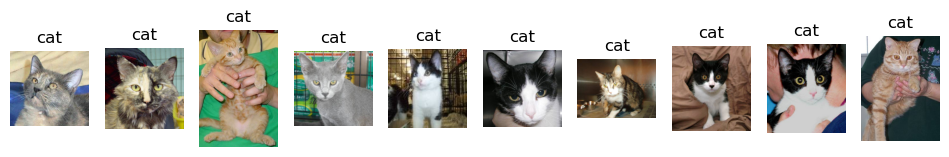

In [79]:
fig, axes = plt.subplots(1, 10, figsize=(12, 3))
size = len(dir)

for i in range(10):
    rand = random.randint(1,size -1)
    image, label = trainloader.dataset[rand]
    image = image.permute(1, 2, 0)
    denormalized_image = image / 2 + 0.5
    axes[i].imshow(denormalized_image)
    axes[i].set_title(classes[trainloader.dataset[i][1]])
    axes[i].axis('off')
plt.show()

# Creating Pytorch Model

In [6]:
class AnimalClassifer(nn.Module):
    def __init__(self, num_classes=2):
        pass
    def forward(self, x):
        pass
    

